# 1. Data Exploration and Cleaning

## Objective
Load the diabetic_data.csv file, perform initial exploration, handle missing values, clean data types, and apply initial transformations.

### Input
- `data/raw/diabetic_data.csv`

### Output
- `data/processed/1_cleaned_data.csv`

---

In [ ]:
# ==============================================================================
# SETUP CELL: Environment and Imports
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Set project root directory for robust path handling
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(PROJECT_ROOT, 'data')
RAW_DATA_DIR = os.path.join(DATA_DIR, 'raw')
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'processed')
MODELS_DIR = os.path.join(PROJECT_ROOT, 'models')

# Ensure directories exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported and environment set successfully.")
print(f"Project Root: {PROJECT_ROOT}")

## Step 1: Load Data and Perform Basic Inspection

Load the diabetic dataset and examine its structure.

In [10]:
# Load the dataset
file_path = os.path.join(RAW_DATA_DIR, 'diabetic_data.csv')
df_raw = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {df_raw.shape}")
print(f"Number of columns: {len(df_raw.columns)}")

# Display first 10 rows
print("\nFirst 10 rows:")
print(df_raw.head(10))

# Display last 5 rows
print("\nLast 5 rows:")
print(df_raw.tail())

# Display data types and info
print("\nDataFrame Info:")
df_raw.info()

Dataset shape: (101766, 50)
Number of columns: 50

First 10 rows:
   encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25  

### Initial Data Inspection Summary

The dataset contains **101,766 rows** and **50 columns**. Key observations include:
- Mix of numerical (13 int64 columns) and categorical (37 object columns) features
- Patient identifiers: `encounter_id` and `patient_nbr`
- Demographic features: `race`, `gender`, `age` (categorical ranges)
- Clinical features: diagnosis codes, medications, lab procedures
- Target variable: `readmitted` with values '<30', '>30', 'NO'
- Missing values are represented as '?' in the raw data

## Step 2: Identify and Represent Missing Values

Replace '?' with NaN and calculate missing value percentages for each column.

Missing Value Analysis:
                   Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636


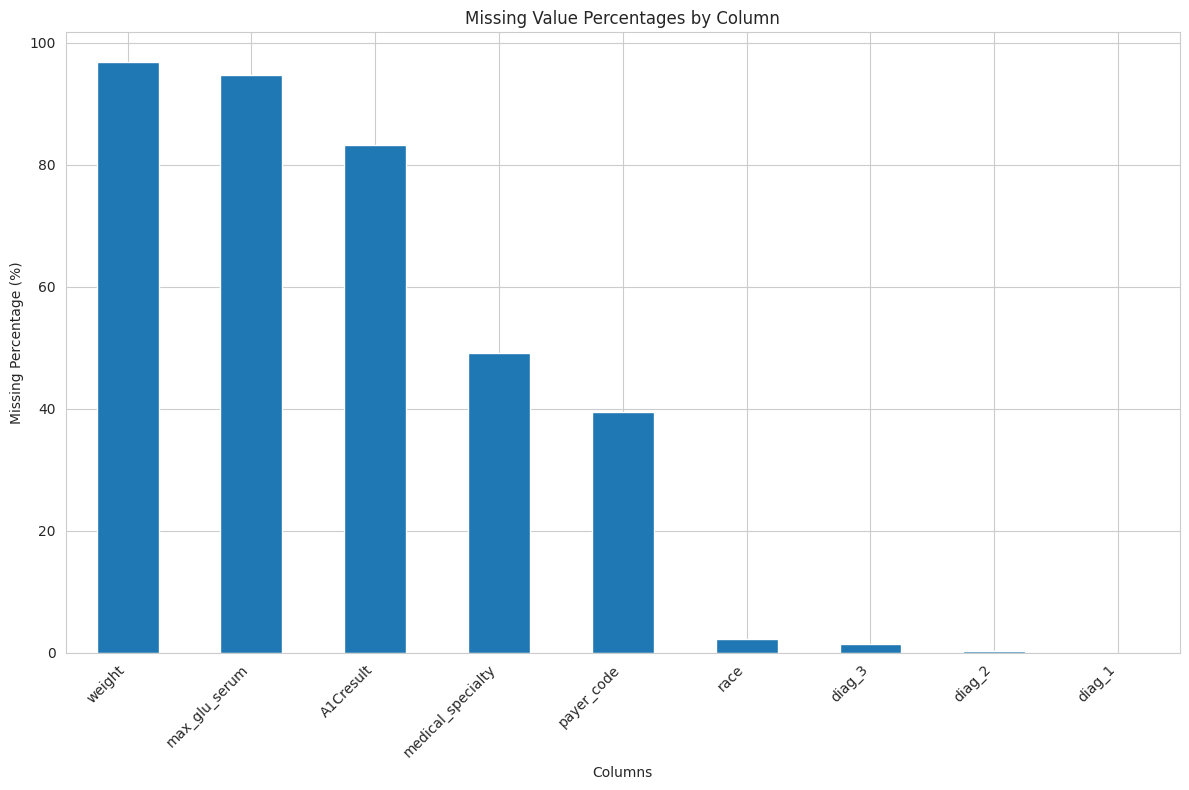

In [11]:
# Replace '?' with NaN for proper missing value handling
df_raw.replace('?', np.nan, inplace=True)

# Calculate missing value percentages
missing_counts = df_raw.isnull().sum()
missing_percentages = (missing_counts / len(df_raw)) * 100

# Create a DataFrame for missing value analysis
missing_analysis = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Sort by missing percentage (descending)
missing_analysis = missing_analysis.sort_values('Missing Percentage', ascending=False)

print("Missing Value Analysis:")
print(missing_analysis[missing_analysis['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 8))
missing_analysis[missing_analysis['Missing Percentage'] > 0]['Missing Percentage'].plot(kind='bar')
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../figures/data_exploration/missing_value_percentages.png", dpi=300, bbox_inches="tight")
plt.show()

### Missing Value Analysis Summary

The analysis reveals significant missing data in several columns:
- **weight**: 96.86% missing values (98,569 out of 101,766 records)
- **payer_code**: 39.56% missing values (40,256 out of 101,766 records)
- **medical_specialty**: 49.08% missing values (49,949 out of 101,766 records)
- **max_glu_serum**: 94.75% missing values
- **A1Cresult**: 83.28% missing values
- **race**: 2.23% missing values
- **diag_1, diag_2, diag_3**: Small percentages of missing values that need handling

Based on this analysis, `weight` and `payer_code` will be excluded due to excessive missing data. The `medical_specialty` column will be retained with missing values coded as 'Missing' to preserve this potentially informative variable.

## Step 3: Handle Columns with Excessive Missing Data

Remove columns with excessive missing data and impute medical_specialty.

In [12]:
# Step 3: Handle columns with excessive missing data
# Based on task_1a analysis, exclude weight and payer_code
# Also exclude identifier columns: encounter_id and patient_nbr
# Impute medical_specialty with 'Missing' category

# List of variables to exclude
columns_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code']

print(f"Columns to drop: {columns_to_drop}")

# Create df_clean by dropping the excluded columns
df_clean = df_raw.drop(columns=columns_to_drop)

# Impute medical_specialty missing values with 'Missing'
df_clean['medical_specialty'].fillna('Missing', inplace=True)

print(f"\nOriginal shape: {df_raw.shape}")
print(f"After exclusion shape: {df_clean.shape}")
print(f"Dropped columns: {set(df_raw.columns) - set(df_clean.columns)}")
print(f"\nMissing values in medical_specialty after imputation: {df_clean['medical_specialty'].isnull().sum()}")
print(f"Number of 'Missing' entries in medical_specialty: {(df_clean['medical_specialty'] == 'Missing').sum()}")

Columns to drop: ['encounter_id', 'patient_nbr', 'weight', 'payer_code']

Original shape: (101766, 50)
After exclusion shape: (101766, 46)
Dropped columns: {'payer_code', 'weight', 'patient_nbr', 'encounter_id'}

Missing values in medical_specialty after imputation: 0
Number of 'Missing' entries in medical_specialty: 49949


## Step 4: Analyze and Clean Individual Columns

Perform detailed inspection and cleaning of key categorical and diagnosis columns.

In [ ]:
# Step 4: Analyze and clean individual columns

# Step 4a: Clean race column
print("=" * 60)
print("RACE COLUMN ANALYSIS")
print("=" * 60)
print("\nBefore cleaning:")
print(df_clean['race'].value_counts(dropna=False))

# Combine NaN and 'Other' into a single category
df_clean['race'].fillna('Other', inplace=True)

print("\nAfter cleaning:")
print(df_clean['race'].value_counts(dropna=False))

# Step 4b: Clean gender column
print("\n" + "=" * 60)
print("GENDER COLUMN ANALYSIS")
print("=" * 60)
print("\nBefore cleaning:")
print(df_clean['gender'].value_counts(dropna=False))

# Count Unknown/Invalid entries
unknown_count = (df_clean['gender'] == 'Unknown/Invalid').sum()
print(f"\nNumber of 'Unknown/Invalid' entries: {unknown_count}")

# Drop rows with Unknown/Invalid gender
initial_rows = len(df_clean)
df_clean = df_clean[df_clean['gender'] != 'Unknown/Invalid'].copy()
final_rows = len(df_clean)

print(f"\nRows before dropping: {initial_rows}")
print(f"Rows after dropping: {final_rows}")
print(f"Rows dropped: {initial_rows - final_rows}")

print("\nAfter cleaning:")
print(df_clean['gender'].value_counts(dropna=False))

# Step 4c: Analyze age column
print("\n" + "=" * 60)
print("AGE COLUMN ANALYSIS")
print("=" * 60)
print("\nAge is an ordered categorical variable with the following distribution:")
print(df_clean['age'].value_counts().sort_index())
print(f"\nTotal unique age categories: {df_clean['age'].nunique()}")
print(f"Missing values in age: {df_clean['age'].isnull().sum()}")

# Step 4d: Clean diagnosis columns (diag_1, diag_2, diag_3)
print("\n" + "=" * 60)
print("DIAGNOSIS COLUMNS ANALYSIS")
print("=" * 60)

for diag_col in ['diag_1', 'diag_2', 'diag_3']:
    print(f"\n{diag_col}:")
    print(f"  Missing values before: {df_clean[diag_col].isnull().sum()}")

    # Replace missing values with '0' (representing no diagnosis)
    df_clean[diag_col].fillna('0', inplace=True)

    print(f"  Missing values after: {df_clean[diag_col].isnull().sum()}")
    print(f"  Number of '0' entries: {(df_clean[diag_col] == '0').sum()}")
    print(f"  Unique values: {df_clean[diag_col].nunique()}")

# Step 4e: Verify change and diabetesMed columns
print("\n" + "=" * 60)
print("CHANGE AND DIABETESMED VERIFICATION")
print("=" * 60)

print("\nchange column:")
print(df_clean['change'].value_counts(dropna=False))
print(f"Missing values: {df_clean['change'].isnull().sum()}")

print("\ndiabetesMed column:")
print(df_clean['diabetesMed'].value_counts(dropna=False))
print(f"Missing values: {df_clean['diabetesMed'].isnull().sum()}")

print("\nBoth columns are clean with consistent 'Ch'/'No' and 'Yes'/'No' categories.")

RACE COLUMN ANALYSIS

Before cleaning:
race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

After cleaning:
race
Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: count, dtype: int64

GENDER COLUMN ANALYSIS

Before cleaning:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Number of 'Unknown/Invalid' entries: 3

Rows before dropping: 101766
Rows after dropping: 101763
Rows dropped: 3

After cleaning:
gender
Female    54708
Male      47055
Name: count, dtype: int64

AGE COLUMN ANALYSIS

Age is an ordered categorical variable with the following distribution:
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22482
[70-80)     26066
[80-90)     17197
[

### Individual Column Cleaning Summary

**Cleaning decisions made:**
- **race**: Combined missing/unknown values into 'Other' category
- **gender**: Removed rows with 'Unknown/Invalid' entries (very small number)
- **age**: Verified as ordered categorical, no cleaning needed
- **diag_1, diag_2, diag_3**: Replaced missing values with '0' (no diagnosis)
- **change, diabetesMed**: Verified as clean binary categories

## Step 5: Final Data Type Conversion and Verification

Convert columns to appropriate data types and create the binary target variable.

In [14]:
# Step 5: Data type conversions and binary target creation

# Check current data types
print("Current data types:")
print(df_clean.dtypes)
print("\n" + "=" * 60)

# Convert readmitted to binary
if 'readmitted' in df_clean.columns:
    print("\nReadmitted unique values:", df_clean['readmitted'].unique())
    # Convert to binary: <30 = 1, >30 or NO = 0
    df_clean['readmitted_binary'] = df_clean['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
    print("\nReadmitted conversion:")
    print(df_clean['readmitted'].value_counts())
    print("\nBinary target distribution:")
    print(df_clean['readmitted_binary'].value_counts())

# Convert categorical columns to pd.Categorical for memory efficiency
print("\n" + "=" * 60)
print("Converting categorical columns to pd.Categorical dtype")
print("=" * 60)

categorical_columns = [
    'race', 'gender', 'age', 'medical_specialty',
    'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'readmitted'
]

# Also include medication columns
medication_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]

categorical_columns.extend(medication_columns)

# Convert to categorical
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')
        print(f"Converted {col} to category")

# Final verification
print("\n" + "=" * 60)
print("FINAL DATA TYPES AFTER CONVERSION")
print("=" * 60)
print(df_clean.dtypes)
print(f"\nFinal shape: {df_clean.shape}")
print(f"\nMemory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Current data types:
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object


## Step 6: Save the Cleaned Dataset

Save the final cleaned dataset for the next step in the pipeline.

In [15]:
# Step 6: Save the cleaned dataset
output_path = os.path.join(PROCESSED_DATA_DIR, '1_cleaned_data.csv')
df_clean.to_csv(output_path, index=False)

print(f"Cleaned dataset successfully saved to: {output_path}")
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Final columns ({len(df_clean.columns)}): {list(df_clean.columns)}")
print(f"\nCleaning summary:")
print(f"  - Original rows: 101,766")
print(f"  - Rows after cleaning: {len(df_clean):,}")
print(f"  - Rows removed: {101766 - len(df_clean):,}")
print(f"  - Columns removed: 4 (encounter_id, patient_nbr, weight, payer_code)")
print(f"  - Missing value '?' replaced with NaN in all columns")
print(f"  - medical_specialty: Imputed with 'Missing'")
print(f"  - race: Missing values replaced with 'Other'")
print(f"  - Diagnosis columns: Missing values replaced with '0'")
print(f"  - Gender: Removed Unknown/Invalid entries")
print(f"  - Target variable: readmitted_binary created (1=<30 days, 0=otherwise)")

Cleaned dataset successfully saved to: /home/ghost/workspace/university/machine_learning_and_computer_vision/assessment_main/data/processed/1_cleaned_data.csv

Final dataset shape: (101763, 47)
Final columns (47): ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'readmitted_binary']

C